In [59]:
import numpy as np
import pandas as pd

In [60]:
df=pd.read_csv("C:/Users/User/Downloads/training_may/Machine Learning/hotel_bookings.csv")
df.shape

(119390, 32)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [62]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [64]:
num_cols=[col for col in df.columns if df[col].dtype!='object']
var_cols=[col for col in df.columns if df[col].dtype=='object']
print("numerical_columns",num_cols)
print("variable columns",var_cols)

numerical_columns ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
variable columns ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


{'whiskers': [<matplotlib.lines.Line2D at 0x2e074710b50>,
 'caps': [<matplotlib.lines.Line2D at 0x2e0749ca090>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e0748a24d0>,
 'medians': [<matplotlib.lines.Line2D at 0x2e0749c9ad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2e074a10b10>,
 'means': []}

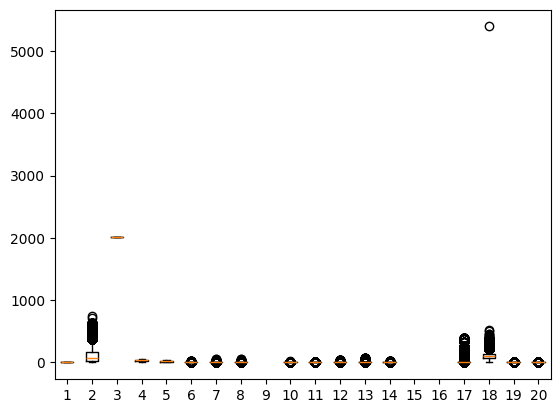

In [65]:
import matplotlib.pyplot as plt
plt.boxplot(df[num_cols])

In [66]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df.drop(columns=['agent', 'company'],inplace=True,errors='ignore')
df.fillna({'children':df['children'].mean()})
df.dropna(subset=[],inplace=True)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [68]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [77]:
num_cols=[col for col in df.columns if df[col].dtype!='object']

In [93]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df[num_cols])
scaled_df=pd.DataFrame(scaled_data,columns=num_cols)
scaled_df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,-0.76704,2.227051,-1.634768,-0.012141,-1.685297,-0.92889,-1.310240,0.247897,-0.260663,-0.081579,-0.18156,-0.10318,-0.091555,4.260101,-0.131924,-2.015038,-0.254873,-0.720694
1,-0.76704,5.923385,-1.634768,-0.012141,-1.685297,-0.92889,-1.310240,0.247897,-0.260663,-0.081579,-0.18156,-0.10318,-0.091555,5.793131,-0.131924,-2.015038,-0.254873,-0.720694
2,-0.76704,-0.907814,-1.634768,-0.012141,-1.685297,-0.92889,-0.786207,-1.478447,-0.260663,-0.081579,-0.18156,-0.10318,-0.091555,-0.338990,-0.131924,-0.530935,-0.254873,-0.720694
3,-0.76704,-0.851667,-1.634768,-0.012141,-1.685297,-0.92889,-0.786207,-1.478447,-0.260663,-0.081579,-0.18156,-0.10318,-0.091555,-0.338990,-0.131924,-0.530935,-0.254873,-0.720694
4,-0.76704,-0.842309,-1.634768,-0.012141,-1.685297,-0.92889,-0.262174,0.247897,-0.260663,-0.081579,-0.18156,-0.10318,-0.091555,-0.338990,-0.131924,-0.075810,-0.254873,0.540666


{'whiskers': [<matplotlib.lines.Line2D at 0x2e00d5d4250>,
 'caps': [<matplotlib.lines.Line2D at 0x2e00d5d68d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e00d5d5850>,
 'medians': [<matplotlib.lines.Line2D at 0x2e00d5bc890>,
 'fliers': [<matplotlib.lines.Line2D at 0x2e00d5b5490>,
 'means': []}

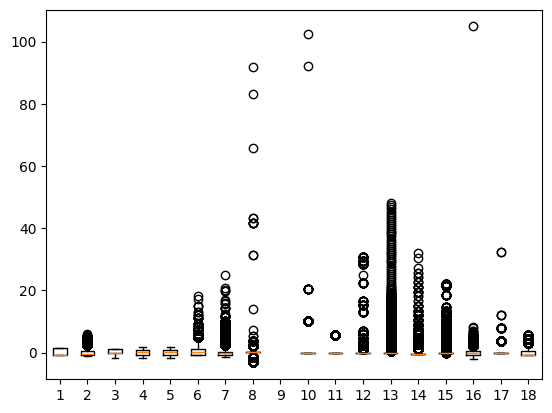

In [97]:
import matplotlib.pyplot as plt
plt.boxplot(scaled_df)

<Axes: >

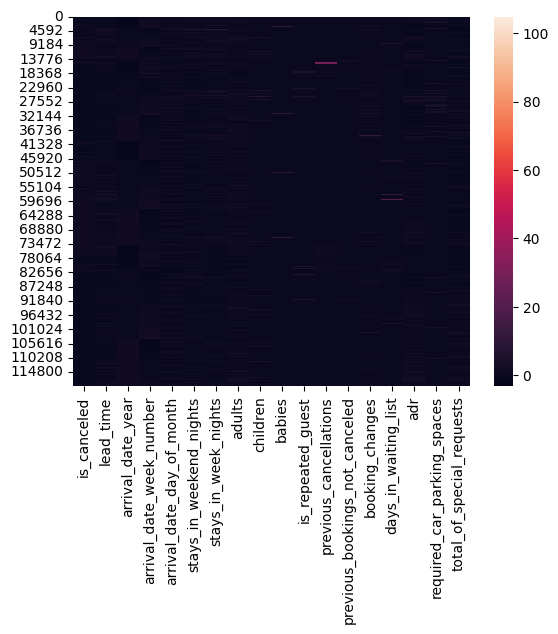

In [99]:
import seaborn as sns
sns.heatmap(scaled_df)

In [ ]:
sns.swarmplot(scaled_df)

In [ ]:
sns.pairplot(scaled_df)